## Impoting libraries

In [1]:
import pandas as pd
import math

In [2]:
df = pd.read_csv("amazon.csv")
df['category'] = df['category'].str.split('|').str[1]
print(df)

      product_id                                       product_name  \
0     B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1     B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2     B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3     B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4     B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   
...          ...                                                ...   
1460  B08L7J3T31  Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...   
1461  B01M6453MB  Prestige Delight PRWO Electric Rice Cooker (1 ...   
1462  B009P2LIL4  Bajaj Majesty RX10 2000 Watts Heat Convector R...   
1463  B00J5DYCCA  Havells Ventil Air DSP 230mm Exhaust Fan (Pist...   
1464  B01486F4G6  Borosil Jumbo 1000-Watt Grill Sandwich Maker (...   

                        category discounted_price actual_price  \
0        Accessories&Peripherals             ₹399       ₹1,099   
1        Access

## Checking the missing values

In [3]:
print(df.isnull().values.any())
df[df.isna().any(axis=1)]

True


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Accessories&Peripherals,₹199,₹999,80%,3.0,NaN,USB C to C Cable: This cable has type C connec...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Accessories&Peripherals,₹249,₹999,75%,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...


### Replacing

In [4]:
df_copy = df.copy() #для завдань 8+
df = df.fillna(method="bfill")

In [5]:
num_df = df.iloc[:, 2:8]
spec_idx = num_df[num_df['rating'] == "|"].index[0]
num_df.iloc[spec_idx] = num_df.iloc[spec_idx-1]
num_df

,category,discounted_price,actual_price,discount_percentage,rating,rating_count
0,Accessories&Peripherals,₹399,"₹1,099",64%,4.2,"24,269"
1,Accessories&Peripherals,₹199,₹349,43%,4.0,"43,994"
2,Accessories&Peripherals,₹199,"₹1,899",90%,3.9,"7,928"
3,Accessories&Peripherals,₹329,₹699,53%,4.2,"94,363"
4,Accessories&Peripherals,₹154,₹399,61%,4.2,"16,905"
...,...,...,...,...,...,...
1460,Kitchen&HomeAppliances,₹379,₹919,59%,4,"1,090"
1461,Kitchen&HomeAppliances,"₹2,280","₹3,045",25%,4.1,"4,118"
1462,"Heating,Cooling&AirQuality","₹2,219","₹3,080",28%,3.6,468
1463,"Heating,Cooling&AirQuality","₹1,399","₹1,890",26%,4,"8,031"


## Parsing values

In [6]:
def parse_values(num_df): ### function created to evoid copy_paste in the last tasks
    def parse_cash(value):
        return float(value[1:].replace(",", ""))
    def parse_percentage(value):
        return int(value[:-1])
    def parse_to_int(value):
        return int(value.replace(",", ""))
    def parse_to_flt(value):
        return float(value.replace(",", ""))
    
    num_df['discounted_price'] = num_df['discounted_price'].apply(parse_cash)
    num_df['actual_price'] = num_df['actual_price'].apply(parse_cash)
    num_df['discount_percentage'] = num_df['discount_percentage'].apply(parse_percentage)
    num_df['rating_count'] = num_df['rating_count'].apply(parse_to_int)
    num_df['rating'] = num_df['rating'].apply(parse_to_flt)
    return num_df

In [7]:
num_df = parse_values(num_df)
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   category             1465 non-null   object 
 1   discounted_price     1465 non-null   float64
 2   actual_price         1465 non-null   float64
 3   discount_percentage  1465 non-null   int64  
 4   rating               1465 non-null   float64
 5   rating_count         1465 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 68.8+ KB


## Max_Min visualising

In [8]:
df_vis = pd.DataFrame([[max(num_df['actual_price']),max(num_df['discount_percentage']),max(num_df['rating']),max(num_df['rating_count'])],
                      [min(num_df['actual_price']),min(num_df['discount_percentage']),min(num_df['rating']),min(num_df['rating_count'])]], 
                      index=pd.Index(['max', 'min']), columns=num_df.columns[2:])

df_ten = num_df.sample(n=10)

def min_max_style(styler):
    styler.highlight_max(color="#edb87e")
    styler.highlight_min(color='#98d5e0')
    return styler

(df_ten.iloc[:, 1:]).style.pipe(min_max_style)

,discounted_price,actual_price,discount_percentage,rating,rating_count
255,54990.000000,85000.000000,35,4.300000,3587
423,199.000000,299.000000,33,4.000000,43994
1176,320.000000,799.000000,60,4.200000,3846
906,649.000000,999.000000,35,3.500000,7222
1227,510.000000,640.000000,20,4.100000,7229
63,329.000000,845.000000,61,4.200000,29746
1276,1235.000000,1499.000000,18,4.100000,203
265,18999.000000,24990.000000,24,4.300000,4702
1099,899.000000,1249.000000,28,3.900000,17424
914,4499.000000,5999.000000,25,4.300000,44696


### Математичне сподівання та дисперсія набору даних

Дисперсія для набору даних

In [9]:
def mean(df_col):
    return df_col.sum()/len(df_col)
def standart_diviation(df_col):   # <--- Dispersion
    mean_f = mean(df_col)
    sum_of_the_squered_differences = 0
    for i in range(len(df_col)):
        sum_of_the_squered_differences += (df_col[i]-mean_f)**2
    return math.sqrt(sum_of_the_squered_differences/len(df_col))

num_df.iloc[:,1:].apply(standart_diviation)

discounted_price        6942.545251
actual_price           10871.991476
discount_percentage       21.613366
rating                     0.291475
rating_count           42711.534669
dtype: float64

#### Standartising the data

In [10]:
def standartise(df_column):
    return (df_column-mean(df_column)) / standart_diviation(df_column)

std_num_df = num_df.copy()
std_num_df ['discounted_price'] = standartise(num_df['discounted_price'])
std_num_df ['actual_price'] = standartise(num_df['actual_price'])
std_num_df ['rating'] = standartise(num_df['rating'])
std_num_df ['discount_percentage'] = standartise(num_df['discount_percentage'])
std_num_df ['rating_count'] = standartise(num_df['rating_count'])


print("=======================Before standartisaion========================")
print(num_df.mean())
print(num_df.std())
print(num_df.var())
print("=======================After standartisaion========================")
print(std_num_df.mean().apply(lambda x: "{:.2f}".format(x)))
print(std_num_df.std().apply(lambda x: "{:.2f}".format(x)))
print(std_num_df.var().apply(lambda x: "{:.2f}".format(x)))

=======================Before standartisaion========================
discounted_price        3128.519747
actual_price            5451.134662
discount_percentage       47.708532
rating                     4.096587
rating_count           18282.472355
dtype: float64
discounted_price        6944.915934
actual_price           10875.703954
discount_percentage       21.620746
rating                     0.291574
rating_count           42726.119452
dtype: float64
discounted_price       4.823186e+07
actual_price           1.182809e+08
discount_percentage    4.674567e+02
rating                 8.501567e-02
rating_count           1.825521e+09
dtype: float64
=======================After standartisaion========================
discounted_price       -0.00
actual_price            0.00
discount_percentage     0.00
rating                 -0.00
rating_count            0.00
dtype: object
discounted_price       1.00
actual_price           1.00
discount_percentage    1.00
rating                 1.00
rating_

C:\Users\glebo\AppData\Local\Temp\ipykernel_12996\3893361229.py:13: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(num_df.mean())
C:\Users\glebo\AppData\Local\Temp\ipykernel_12996\3893361229.py:14: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(num_df.std())
C:\Users\glebo\AppData\Local\Temp\ipykernel_12996\3893361229.py:15: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only v

## Analyse the data

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

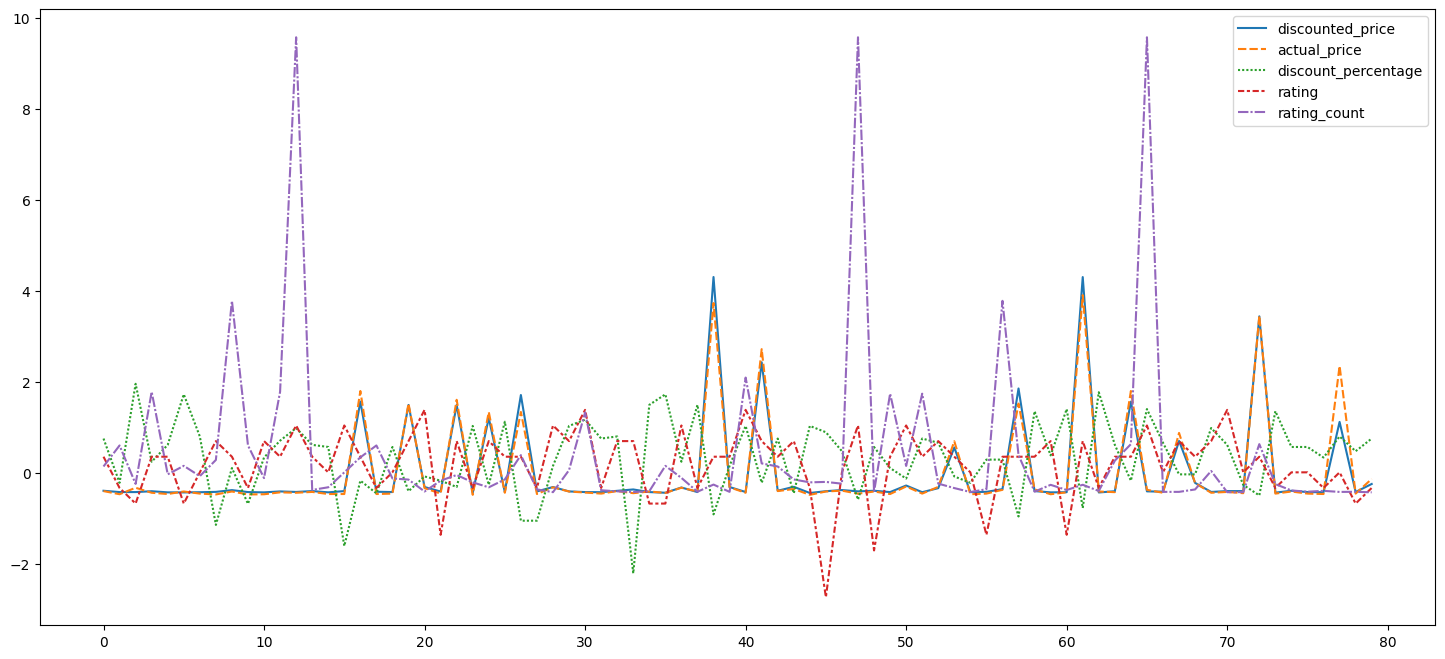

In [12]:
plt.figure(figsize=(18,8))
sns.lineplot(std_num_df.head(80))

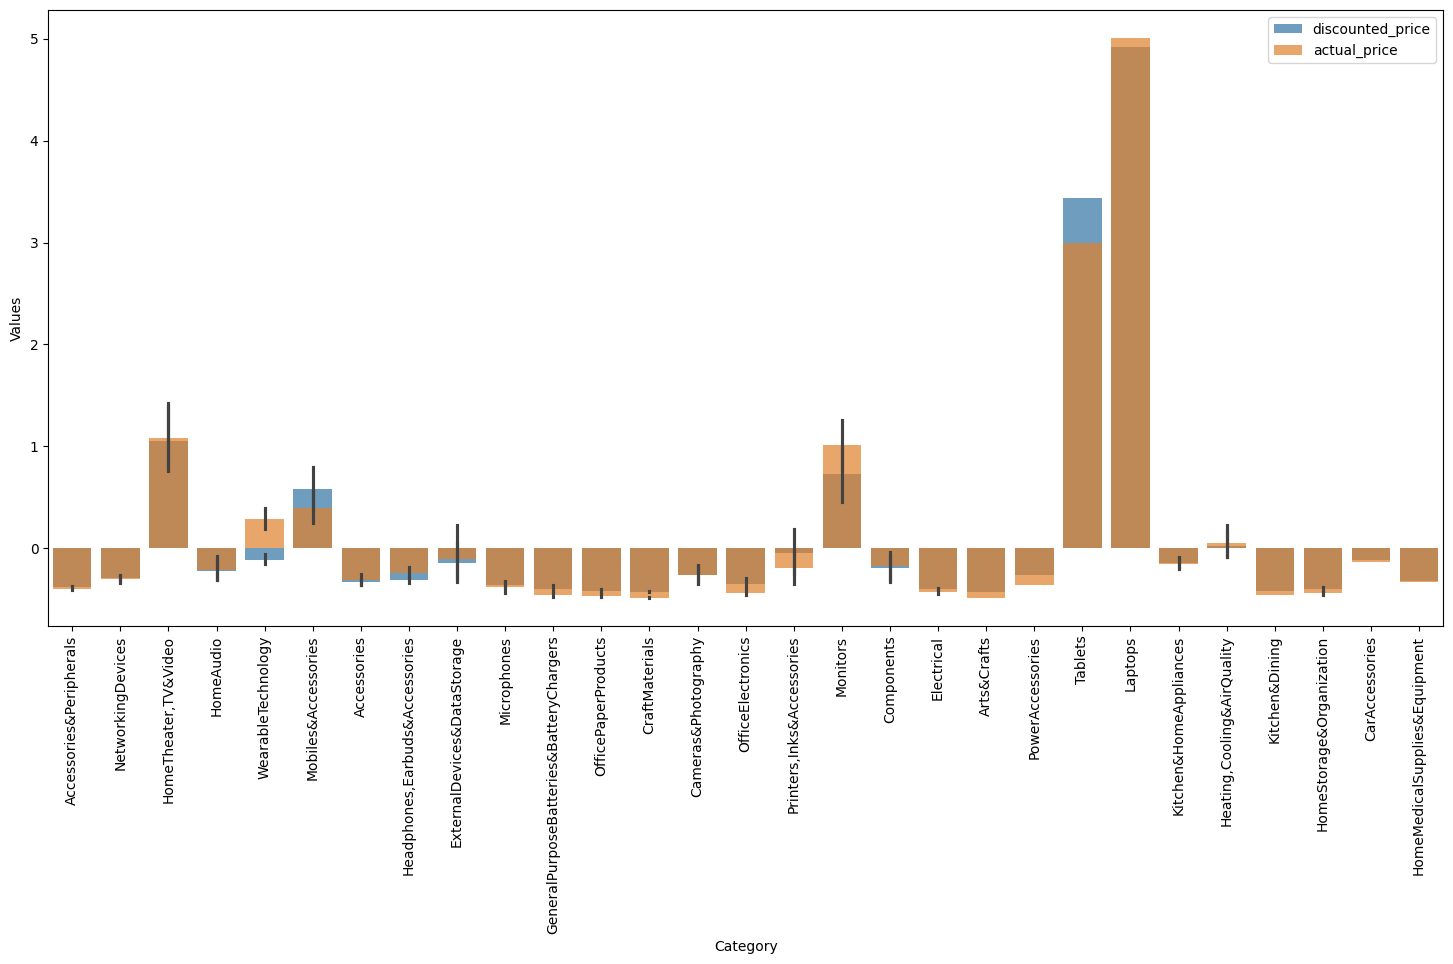

In [13]:
import numpy as np

plt.figure(figsize=(18,8))
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Values')
for column in ['discounted_price', 'actual_price']:
    sns.barplot(x='category', y=column, data=std_num_df, label=column, alpha=0.7)

<Axes: >

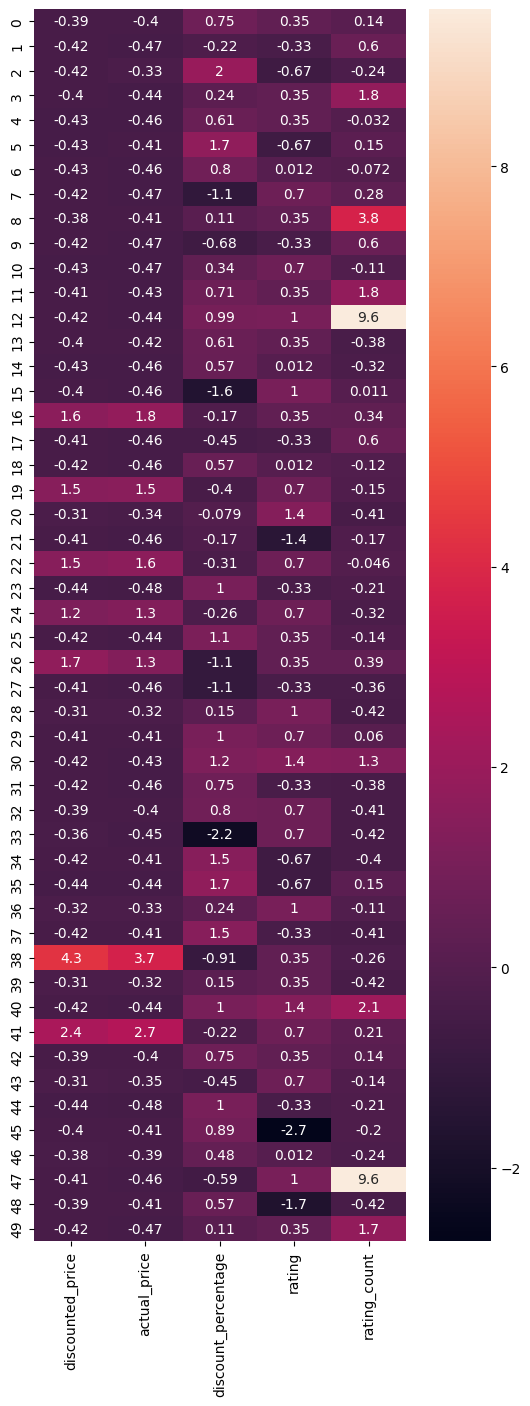

In [14]:
plt.figure(figsize=(6,16))
sns.heatmap(std_num_df.head(50).iloc[:,1:], annot=True)

<Axes: xlabel='Count', ylabel='category'>

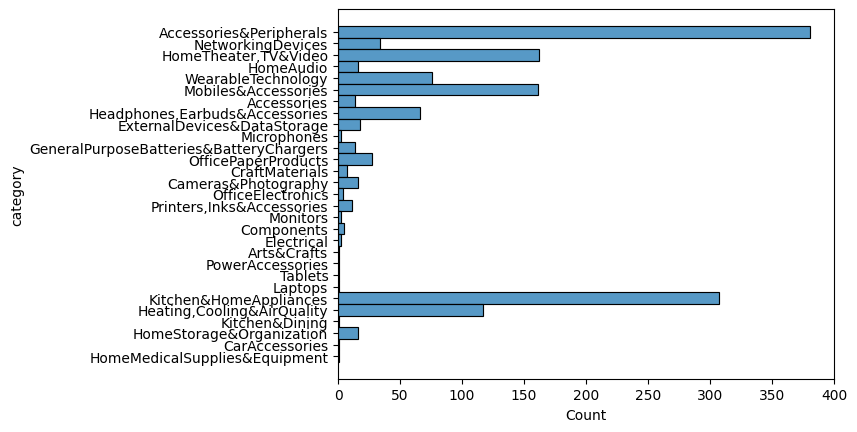

In [15]:
sns.histplot(data=std_num_df, y='category')

З графіку видно, що Аксесуарів купували найбільше, і найменше купували товарів домашньої медицини

### Збудувати лінійний графік з 4-ма лініями, які взяті з ознак та додати annotate для середнього значення кожної лінії.

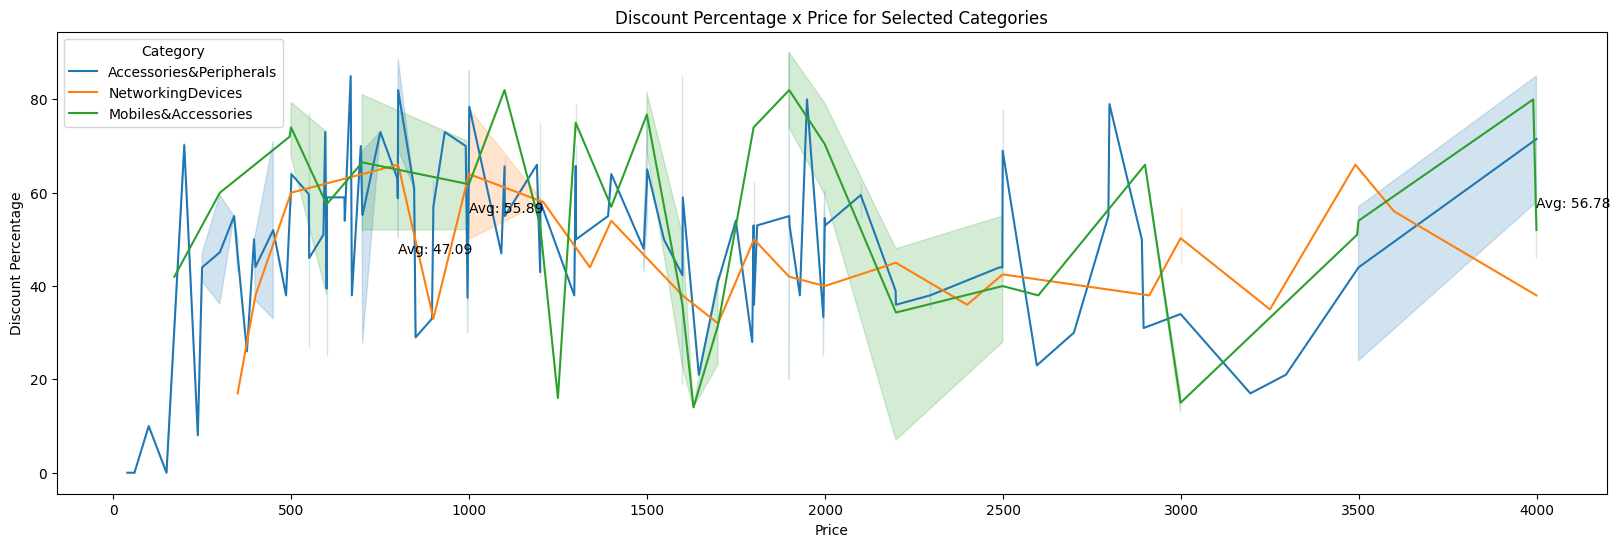

In [16]:
selected_categories = ['Accessories&Peripherals', 'NetworkingDevices', 'Mobiles&Accessories']
selected_data = num_df[num_df['category'].isin(selected_categories) & (num_df['actual_price'] < 4000)]

plt.figure(figsize=(20, 6))

sns.lineplot(data=selected_data, x='actual_price', y='discount_percentage', hue='category')

plt.title('Discount Percentage x Price for Selected Categories')
plt.xlabel('Price')
plt.ylabel('Discount Percentage')
plt.legend(title='Category')

# adding the annotate 
for category in selected_categories:
    category_data = selected_data[selected_data['category'] == category]
    average_value = category_data['discount_percentage'].mean()
#     print(average_value)
    plt.annotate(f'Avg: {average_value:.2f}', xy=(category_data['actual_price'].iloc[-1], average_value))


Лінійний графік показує відношення Відсотку знижки до Ціни товару з обраних категорій 

### Для візуалізації багатовимірних даних з кількістю ознак використовуєть pairplot для візуалізації їх комбінування

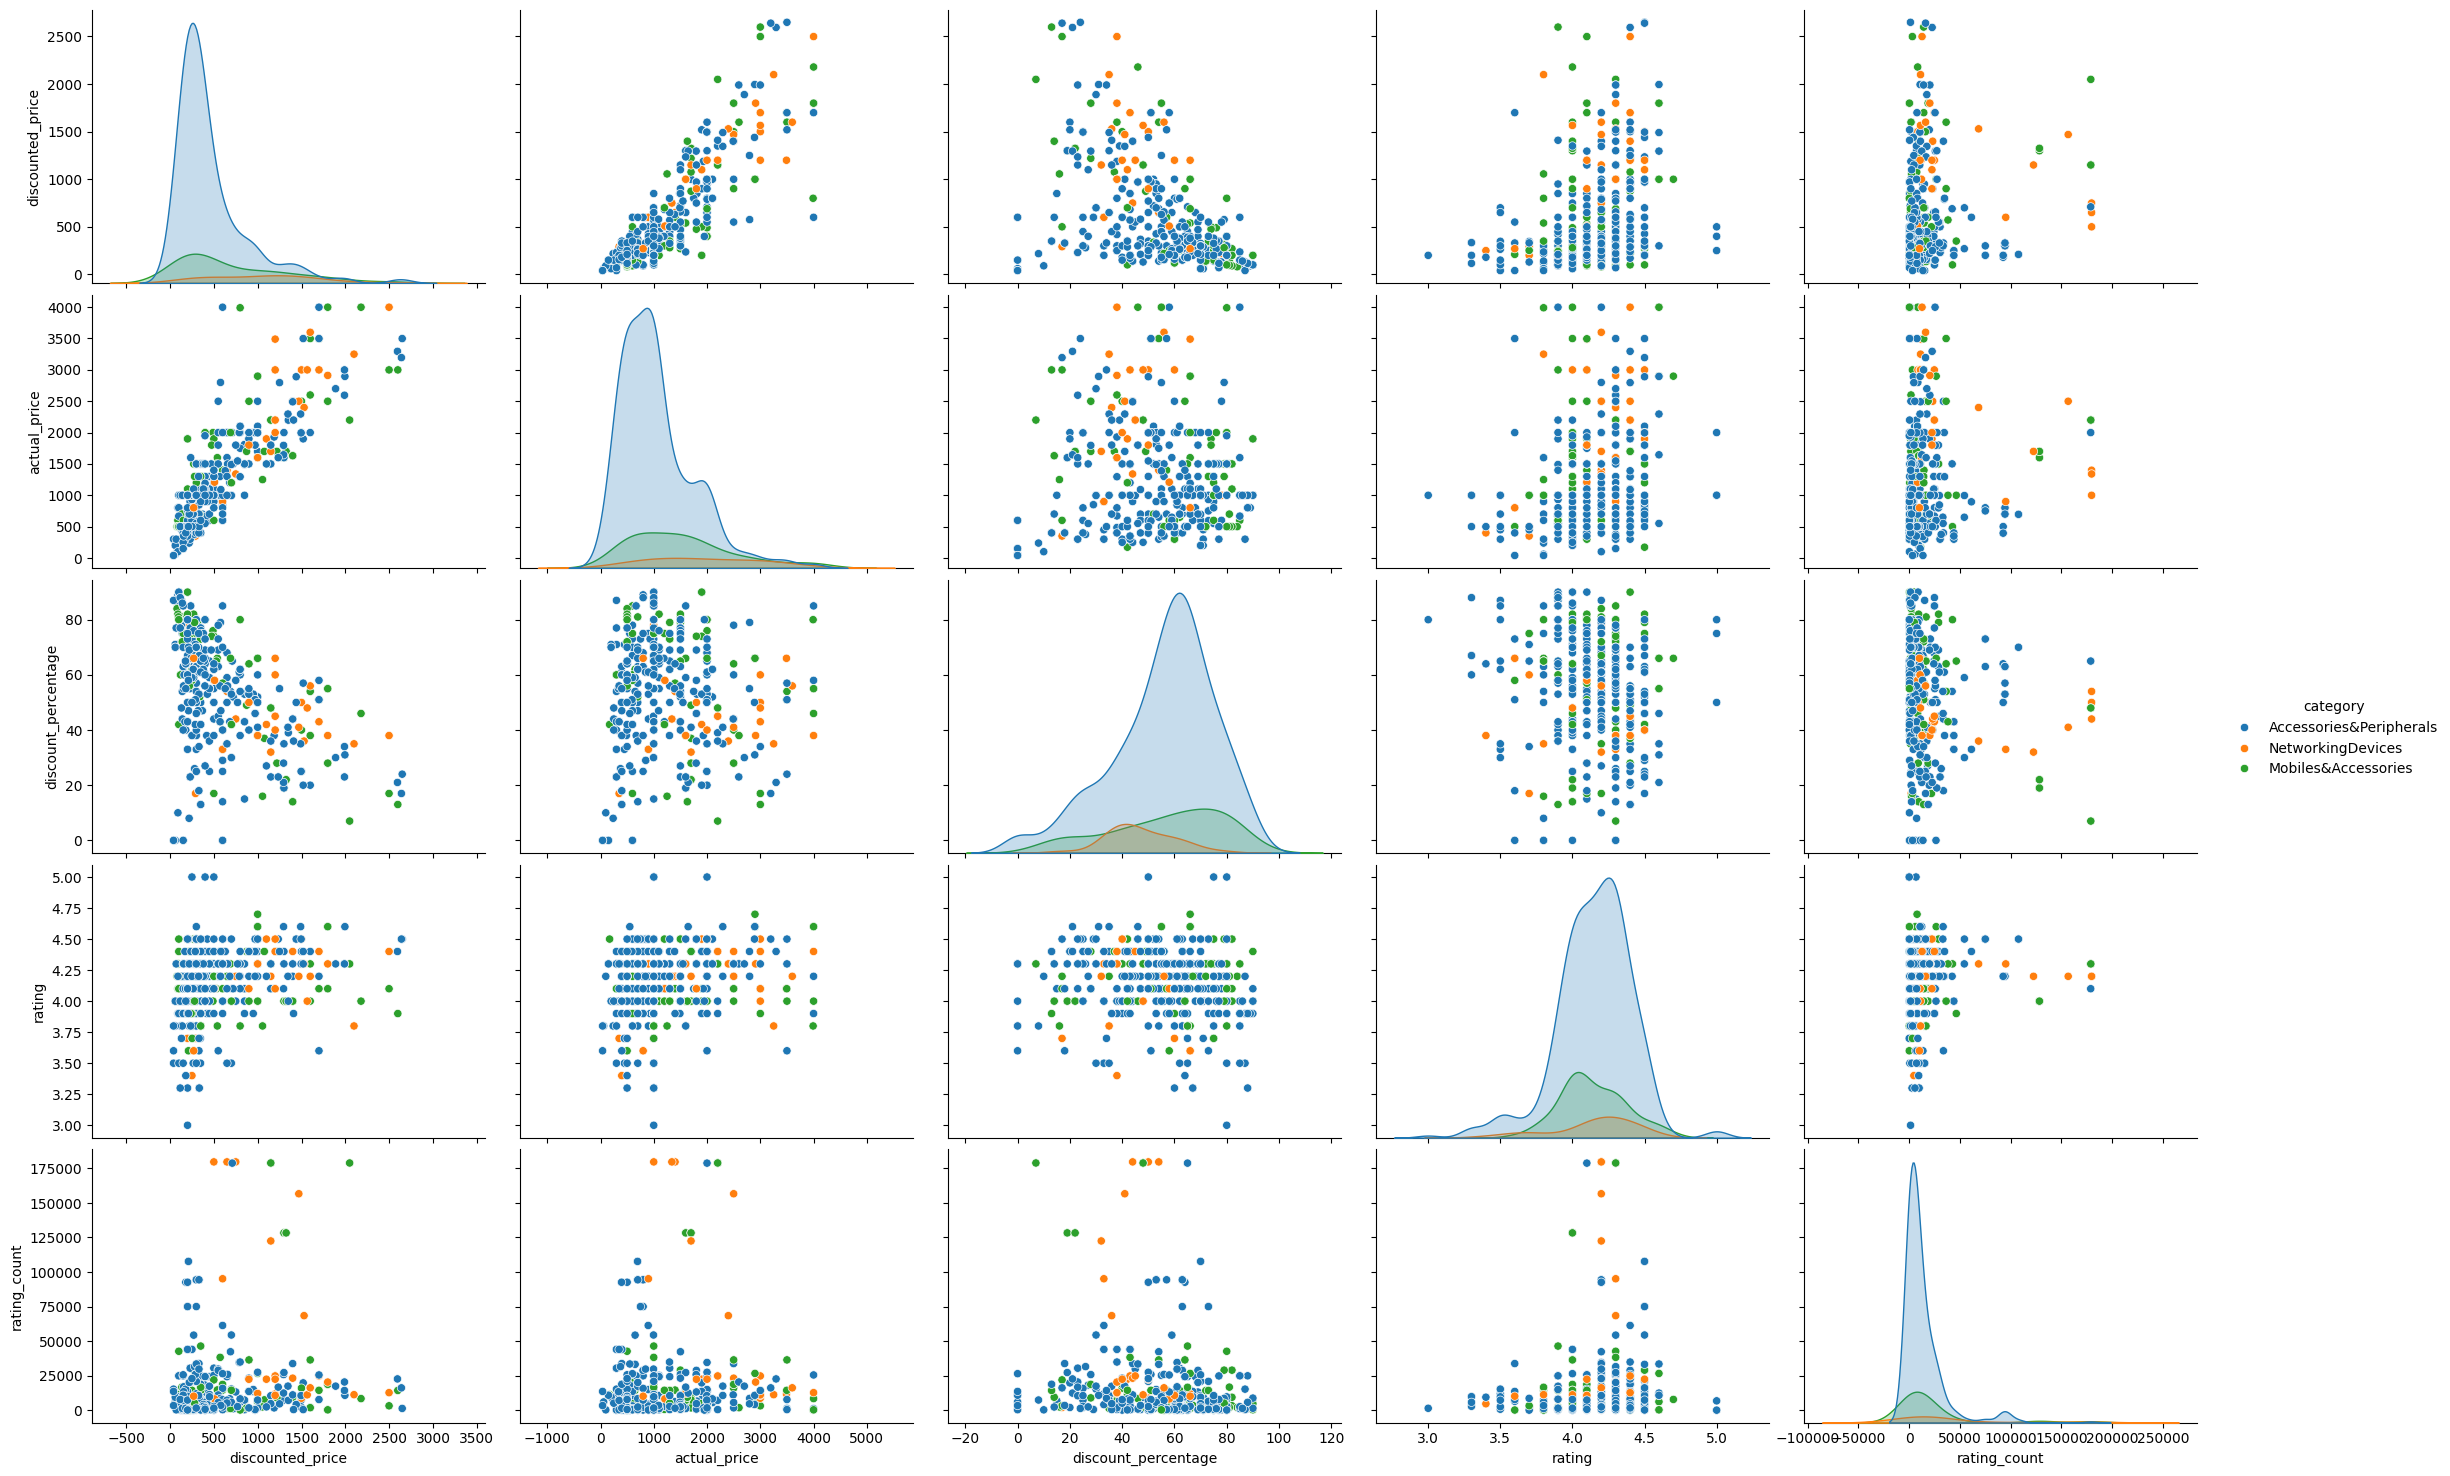

In [17]:
sns.pairplot(selected_data, hue='category', height=3, aspect=1.5)

## Pearson's koef

In [18]:
num_df.corr(method='pearson', numeric_only=True)

,discounted_price,actual_price,discount_percentage,rating,rating_count
discounted_price,1.000000,0.961927,-0.242821,0.120330,-0.027172
actual_price,0.961927,1.000000,-0.118560,0.121633,-0.036089
discount_percentage,-0.242821,-0.118560,1.000000,-0.155373,0.010680
rating,0.120330,0.121633,-0.155373,1.000000,0.101837
rating_count,-0.027172,-0.036089,0.010680,0.101837,1.000000


З цього можна побачити що найбільшу кореляцію мають discounted_ і actual_price. 
Такий результат маємо через те що часто $price_{discounted}=price_{actual}-rice_{actual}*percentage_{discount}$

### Візуалізація відношення за допомогою relplot для двох ознак, що мають найбільшу кореляцію

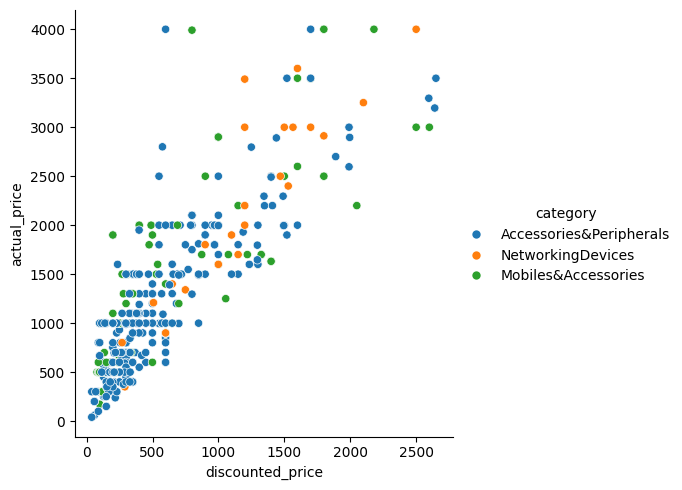

In [19]:
sns.relplot(selected_data, x='discounted_price', y='actual_price', hue='category')

## У початковому наборі даних, перед заміною значень Nan на валідні значення за допомогою fillna, необхідно видалити всі колонки із значеннями Nan.

In [20]:
df_copy = df_copy.dropna()

df_copy['product_name'] = df_copy['product_name'].str.split(' ').str[0]

df_for_corr = df_copy.iloc[:, 1:8]

spec_idx = df_for_corr[df_for_corr['rating'] == "|"].index
df_for_corr.loc[spec_idx, 'rating'] = "1"


df_for_corr = parse_values(df_for_corr)

## Видалити також випадкові значення з ознак що мають найбільшу кореляцію у кількості 10% для обох. Підрахувати кореляцію.

In [21]:
df_for_corr.corr(method='pearson', numeric_only=True)

,discounted_price,actual_price,discount_percentage,rating,rating_count
discounted_price,1.000000,0.961906,-0.241969,0.117697,-0.027261
actual_price,0.961906,1.000000,-0.117494,0.119848,-0.036137
discount_percentage,-0.241969,-0.117494,1.000000,-0.139495,0.011691
rating,0.117697,0.119848,-0.139495,1.000000,0.101302
rating_count,-0.027261,-0.036137,0.011691,0.101302,1.000000


In [22]:
rows_to_remove = int(0.1 * len(df_for_corr))

rows_to_remove_indices = np.random.choice(df_for_corr.index, size=rows_to_remove)
df_for_corr = df_for_corr.drop(index=rows_to_remove_indices)
df_for_corr

,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count
1,Ambrane,Accessories&Peripherals,199.00,349.0,43,4.0,43994
2,Sounce,Accessories&Peripherals,199.00,1899.0,90,3.9,7928
3,boAt,Accessories&Peripherals,329.00,699.0,53,4.2,94363
4,Portronics,Accessories&Peripherals,154.00,399.0,61,4.2,16905
6,boAt,Accessories&Peripherals,176.63,499.0,65,4.1,15188
...,...,...,...,...,...,...,...
1458,Libra,"Heating,Cooling&AirQuality",949.00,2299.0,59,3.6,550
1460,Noir,Kitchen&HomeAppliances,379.00,919.0,59,4.0,1090
1461,Prestige,Kitchen&HomeAppliances,2280.00,3045.0,25,4.1,4118
1462,Bajaj,"Heating,Cooling&AirQuality",2219.00,3080.0,28,3.6,468


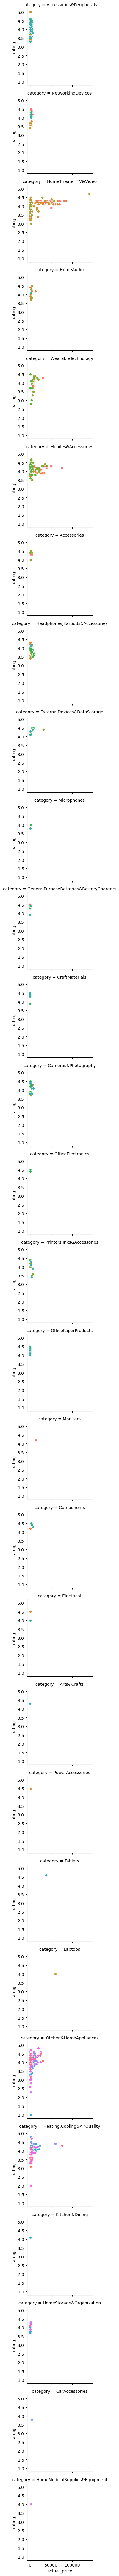

In [23]:
g = sns.FacetGrid(df_for_corr, row='category', hue='product_name')
g.map(sns.scatterplot, 'actual_price', 'rating')
plt.show()